<a href="https://colab.research.google.com/github/sachinmotwani20/DigitalSignalProcessing-Python/blob/master/HammHannWindow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/brief-introduction-of-hamming-and-hanning-function-as-the-preprocessing-of-discrete-fourier-8b87fe538bb7

#Hamming v/s Hanning Window
Here


*   M: Total Data or Memory
*   n: Represents current Iteration



In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#setting
minus_step = 9
frequency = 4
total_time = 10
res = 0.01

time = np.arange(0, total_time, res)
amplitude = np.sin(2 * np.pi * frequency * (time/time[-1]))

def hann(M):
	hann_array = np.zeros(M)
	for n in range(M):
		hann_array[n] = 0.5 - 0.5 * np.cos((2 * np.pi * n) / (M - 1)) #Formula of Hanning Window
	return hann_array

def hamm(M):
	hann_array = np.zeros(M)
	for n in range(M):
		hann_array[n] = 0.5386 - 0.46164 * np.cos((2 * np.pi * n) / (M - 1)) #Formula for Hamming Window
	return hann_array

hann_weight = hann(len(amplitude))
hamm_weight = hamm(len(amplitude))

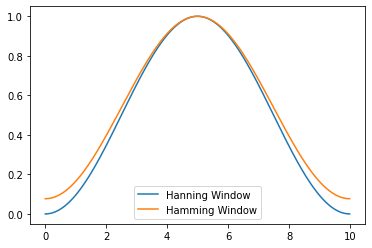

In [3]:
plt.plot(time, hann_weight, label= 'Hanning Window')
plt.plot(time, hamm_weight, label= 'Hamming Window')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


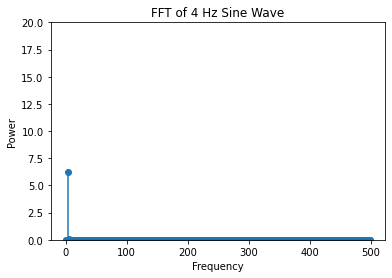

In [6]:
#apply fft
fftdata = np.fft.fft(amplitude)
fftdatafreq = np.zeros(len(amplitude))
for i in range(len(fftdata)):
	fftdatafreq[i] = abs(fftdata[i].real)

plt.stem(np.arange(0, len(time) // 2), fftdatafreq[:len(time) // 2])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('FFT of 4 Hz Sine Wave')
plt.ylim(0,20)
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


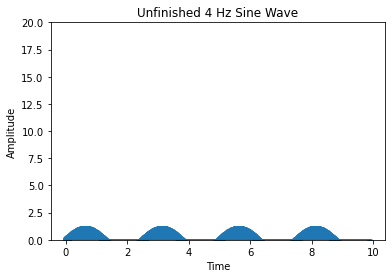

In [7]:
#modify
time = time[:-minus_step]
amplitude = amplitude[:-minus_step]

plt.stem(time, amplitude)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Unfinished 4 Hz Sine Wave')
plt.ylim([0,20])
plt.show()


In [0]:
#apply fft
fftdata = np.fft.fft(amplitude)
fftdatafreq = np.zeros(len(amplitude))
for i in range(len(fftdata)):
	fftdatafreq[i] = abs(fftdata[i].real)

plot_data(np.arange(0, len(time) // 2), fftdatafreq[:len(time) // 2], 'Frequency', 
'Power', 'sin_wave-modified_fft.png', title='FFT of Unfinished 4 Hz Sine Wave', y_lim=[0,20], plot_type='stem')